**ESERCIZITAZIONE 4:**

E' riportata l'analisi dati della simulazione della dinamica molecolare. La simulazione è strutturata sulla dinamica di 108 particelle in un box di volume $V$ con condizioni al contorno periodiche. L'integrazione numerica è effettuata applicando l'algoritmo di Verlet alle equazioni del moto con potenziale soggetto ad un cutoff. Si lavora in un Ensemble micro-canonico, con energia totale fissata.

La statistica deve essere accumulata attraverso il data-blocking, il cui utilizzo, in questa esercitazione, ha una motivazione fisica ben precisa. Infatti, ogni grandezza termodinamica $X$, per avere un significato fisico, deve essere valutata come media in fase $<X>$ su un numero di configurazioni sufficienti a descrivere uno stato termodinamico. Quindi, si deve scegliere un numero $N$ di step per ogni blocco e un numero $M$ complessivo di blocchi.
    

**Esercizio 4.1:** Si calcola la temperatura per lo stato solido:

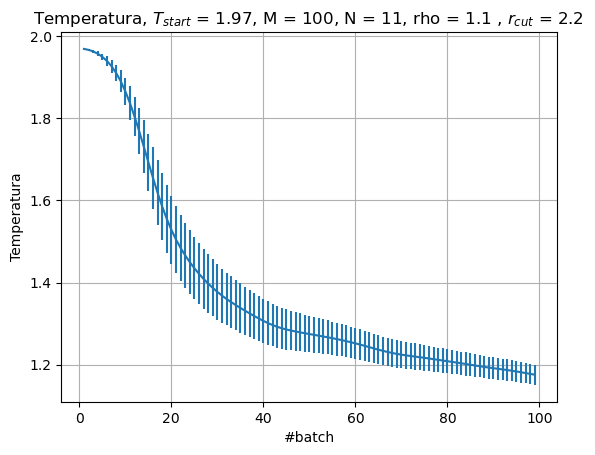

In [9]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Codici_finali/Esercizio_4.1/NSL_SIMULATOR/OUTPUT/temperature.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(3,4) , names = ('Media' , 'Stdev_Media') , header = 0)

#estrarre i dati dalle colonne del file di testo
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = len(Media_vector);
N_vector = np.zeros(N)
#print(Media_vector)
for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(N_vector, Media_vector, yerr = Stdev_Media_vector)
plt.title('Temperatura, $T_{start}$ = 1.97, M = 100, N = 11, rho = 1.1 , $r_{cut}$ = 2.2 ')
plt.xlabel('#batch')
plt.ylabel('Temperatura')
plt.grid(True)
plt.show()

Si calcola la pressione:

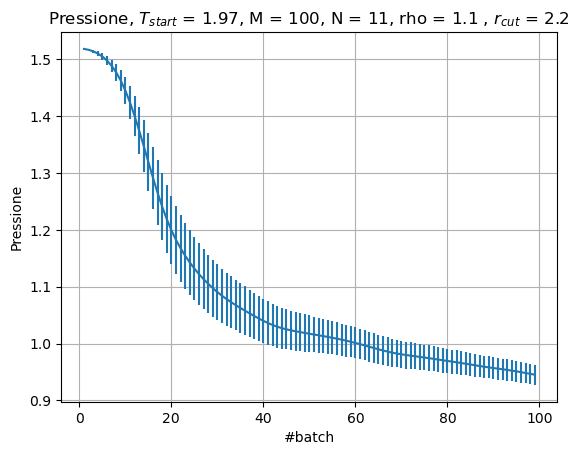

In [10]:
#Lettura file
filename = "Codici_finali/Esercizio_4.1/NSL_SIMULATOR/OUTPUT/pressure.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(3,4) , names = ('Media' , 'Stdev_Media'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = len(Media_vector);
N_vector = np.zeros(N)
#print(Media_vector)
for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(N_vector, Media_vector, yerr = Stdev_Media_vector)
plt.title('Pressione, $T_{start}$ = 1.97, M = 100, N = 11, rho = 1.1 , $r_{cut}$ = 2.2')
plt.xlabel('#batch')
plt.ylabel('Pressione')
plt.grid(True)
plt.show()

Da queste valutazioni preliminari dell'evoluzione di temperatura e pressione per lo stato solido, si evidenzia la mancanza di una equilibrazione iniziale, ovvero il sistema è stato studiato prima di raggiungere l'equilibrio termodinamico, da cui segue la mancanza di stazionarietà delle grandezze termodinamiche.

**Esercizio 4.2:** Dinamica molecolare di un solido Argon, dopo $450$ step di equilibrazione:

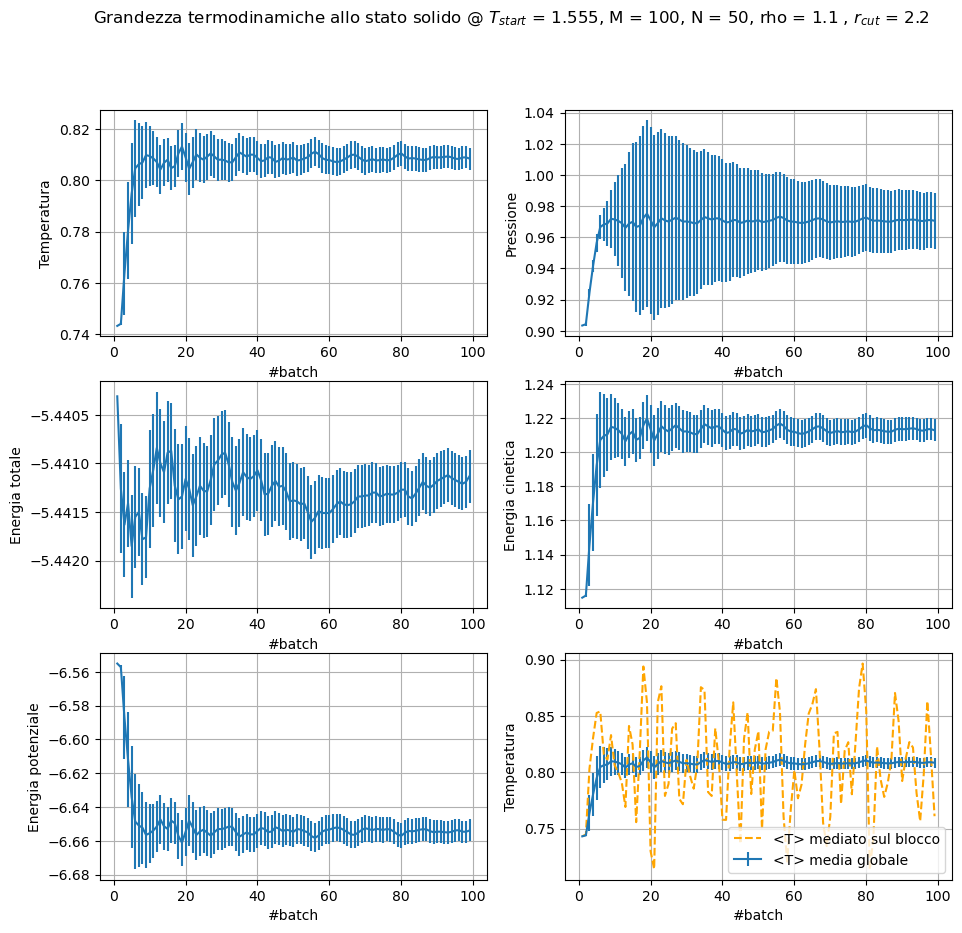

In [5]:
## STATO SOLIDO: equilibrio raggiunto dopo 450 step partendo da T = 1.555
#Lettura file
filename_pressure = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_SOLID/OUTPUT/pressure.txt"
filename_temperature = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_SOLID/OUTPUT/temperature.txt"
filename_kinetic_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_SOLID/OUTPUT/kinetic_energy.txt"
filename_potential_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_SOLID/OUTPUT/potential_energy.txt"
filename_total_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_SOLID/OUTPUT/total_energy.txt"

PRS = pd.read_table(filename_pressure, delimiter = "\t" , usecols=(3,4) , 
names = ('P_Media', 'P_Stdev_Media'),header = 0 )

TEM = pd.read_table(filename_temperature, delimiter = "\t" , usecols=(2,3,4) , 
names = ('T_Current', 'T_Media', 'T_Stdev_Media'),header = 0 )

KEN = pd.read_table(filename_kinetic_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('KE_Media', 'KE_Stdev_Media'),header = 0 )

PEN = pd.read_table(filename_potential_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('PE_Media', 'PE_Stdev_Media'),header = 0 )

TEN = pd.read_table(filename_total_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('TE_Media', 'TE_Stdev_Media'),header = 0 )

#estrarre i dati dalle colonne del file di testo
TEM['T_Current'] = pd.to_numeric(TEM['T_Current'] , errors = 'coerce')
TEM['T_Media'] = pd.to_numeric(TEM['T_Media'] , errors = 'coerce')
TEM['T_Stdev_Media'] = pd.to_numeric(TEM['T_Stdev_Media'] , errors = 'coerce')

PRS['P_Media'] = pd.to_numeric(PRS['P_Media'] , errors = 'coerce')
PRS['P_Stdev_Media'] = pd.to_numeric(PRS['P_Stdev_Media'] , errors = 'coerce')

TEN['TE_Media'] = pd.to_numeric(TEN['TE_Media'] , errors = 'coerce')
TEN['TE_Stdev_Media'] = pd.to_numeric(TEN['TE_Stdev_Media'] , errors = 'coerce')

KEN['KE_Media'] = pd.to_numeric(KEN['KE_Media'] , errors = 'coerce')
KEN['KE_Stdev_Media'] = pd.to_numeric(KEN['KE_Stdev_Media'] , errors = 'coerce')

PEN['PE_Media'] = pd.to_numeric(PEN['PE_Media'] , errors = 'coerce')
PEN['PE_Stdev_Media'] = pd.to_numeric(PEN['PE_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
T_Current_vector = TEM['T_Current']
T_Media_vector = TEM['T_Media']
T_Stdev_Media_vector = TEM['T_Stdev_Media']

P_Media_vector = PRS['P_Media']
P_Stdev_Media_vector = PRS['P_Stdev_Media']

TE_Media_vector = TEN['TE_Media']
TE_Stdev_Media_vector = TEN['TE_Stdev_Media']

KE_Media_vector = KEN['KE_Media']
KE_Stdev_Media_vector = KEN['KE_Stdev_Media']

PE_Media_vector = PEN['PE_Media']
PE_Stdev_Media_vector = PEN['PE_Stdev_Media']

#generare Array di interi da 1 a N
N = len(T_Media_vector);
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
fig, axs = plt.subplots(3,2, figsize = (11,10))
fig.suptitle('Grandezza termodinamiche allo stato solido @ $T_{start}$ = 1.555, M = 100, N = 50, rho = 1.1 , $r_{cut}$ = 2.2 ')

axs[0,0].errorbar(N_vector, T_Media_vector, yerr = T_Stdev_Media_vector)
axs[0,0].set_xlabel('#batch')
axs[0,0].set_ylabel('Temperatura')
axs[0,0].grid(True)

axs[0,1].errorbar(N_vector, P_Media_vector, yerr = Stdev_Media_vector)
axs[0,1].set_xlabel('#batch')
axs[0,1].set_ylabel('Pressione')
axs[0,1].grid(True)

axs[1,0].errorbar(N_vector, TE_Media_vector, yerr = TE_Stdev_Media_vector)
axs[1,0].set_xlabel('#batch')
axs[1,0].set_ylabel('Energia totale')
axs[1,0].grid(True)

axs[1,1].errorbar(N_vector, KE_Media_vector, yerr = KE_Stdev_Media_vector)
axs[1,1].set_xlabel('#batch')
axs[1,1].set_ylabel('Energia cinetica')
axs[1,1].grid(True)

axs[2,0].errorbar(N_vector, PE_Media_vector, yerr = PE_Stdev_Media_vector)
axs[2,0].set_xlabel('#batch')
axs[2,0].set_ylabel('Energia potenziale')
axs[2,0].grid(True)

axs[2,1].errorbar(N_vector, T_Media_vector, yerr = T_Stdev_Media_vector, label = '<T> media globale')
axs[2,1].plot(N_vector, T_Current_vector, linestyle = '--', color = 'orange', label = '<T> mediato sul blocco')
axs[2,1].set_xlabel('#batch')
axs[2,1].set_ylabel('Temperatura')
axs[2,1].legend()
axs[2,1].grid(True)

plt.show()

Dinamica molecolare di un liquido Argon, dopo $2000$ step di equlibrazione:

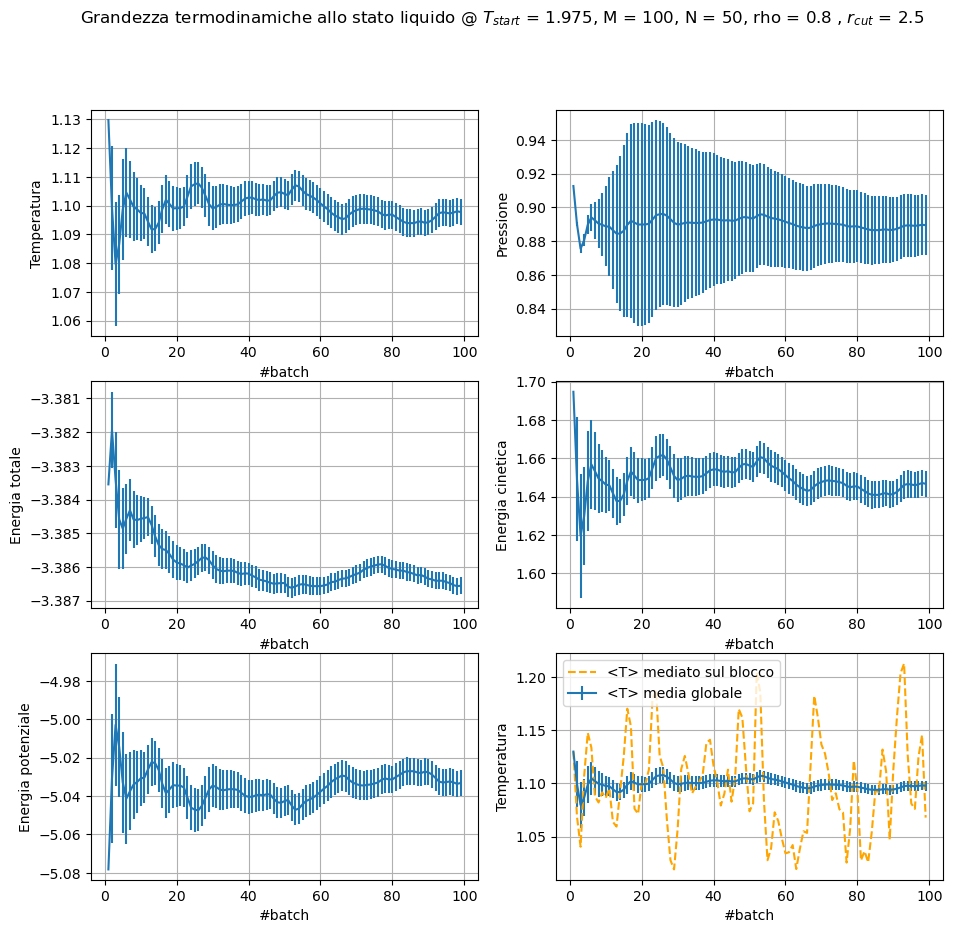

In [6]:
## STATO LIQUIDO: equilibrio raggiunto dopo 2000 step partendo da T = 1.975
#Lettura file
filename_pressure = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_LIQUID/OUTPUT/pressure.txt"
filename_temperature = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_LIQUID/OUTPUT/temperature.txt"
filename_kinetic_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_LIQUID/OUTPUT/kinetic_energy.txt"
filename_potential_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_LIQUID/OUTPUT/potential_energy.txt"
filename_total_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_LIQUID/OUTPUT/total_energy.txt"

PRS = pd.read_table(filename_pressure, delimiter = "\t" , usecols=(3,4) , 
names = ('P_Media', 'P_Stdev_Media'),header = 0 )

TEM = pd.read_table(filename_temperature, delimiter = "\t" , usecols=(2,3,4) , 
names = ('T_Current', 'T_Media', 'T_Stdev_Media'),header = 0 )

KEN = pd.read_table(filename_kinetic_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('KE_Media', 'KE_Stdev_Media'),header = 0 )

PEN = pd.read_table(filename_potential_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('PE_Media', 'PE_Stdev_Media'),header = 0 )

TEN = pd.read_table(filename_total_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('TE_Media', 'TE_Stdev_Media'),header = 0 )

#estrarre i dati dalle colonne del file di testo
TEM['T_Current'] = pd.to_numeric(TEM['T_Current'] , errors = 'coerce')
TEM['T_Media'] = pd.to_numeric(TEM['T_Media'] , errors = 'coerce')
TEM['T_Stdev_Media'] = pd.to_numeric(TEM['T_Stdev_Media'] , errors = 'coerce')

PRS['P_Media'] = pd.to_numeric(PRS['P_Media'] , errors = 'coerce')
PRS['P_Stdev_Media'] = pd.to_numeric(PRS['P_Stdev_Media'] , errors = 'coerce')

TEN['TE_Media'] = pd.to_numeric(TEN['TE_Media'] , errors = 'coerce')
TEN['TE_Stdev_Media'] = pd.to_numeric(TEN['TE_Stdev_Media'] , errors = 'coerce')

KEN['KE_Media'] = pd.to_numeric(KEN['KE_Media'] , errors = 'coerce')
KEN['KE_Stdev_Media'] = pd.to_numeric(KEN['KE_Stdev_Media'] , errors = 'coerce')

PEN['PE_Media'] = pd.to_numeric(PEN['PE_Media'] , errors = 'coerce')
PEN['PE_Stdev_Media'] = pd.to_numeric(PEN['PE_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
T_Current_vector = TEM['T_Current']
T_Media_vector = TEM['T_Media']
T_Stdev_Media_vector = TEM['T_Stdev_Media']

P_Media_vector = PRS['P_Media']
P_Stdev_Media_vector = PRS['P_Stdev_Media']

TE_Media_vector = TEN['TE_Media']
TE_Stdev_Media_vector = TEN['TE_Stdev_Media']

KE_Media_vector = KEN['KE_Media']
KE_Stdev_Media_vector = KEN['KE_Stdev_Media']

PE_Media_vector = PEN['PE_Media']
PE_Stdev_Media_vector = PEN['PE_Stdev_Media']

#generare Array di interi da 1 a N
N = len(T_Media_vector);
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
#disegnare grafico di media con barre d'errore (deviazione standard della media)
fig, axs = plt.subplots(3,2, figsize = (11,10))
fig.suptitle('Grandezza termodinamiche allo stato liquido @ $T_{start}$ = 1.975, M = 100, N = 50, rho = 0.8 , $r_{cut}$ = 2.5 ')

axs[0,0].errorbar(N_vector, T_Media_vector, yerr = T_Stdev_Media_vector)
axs[0,0].set_xlabel('#batch')
axs[0,0].set_ylabel('Temperatura')
axs[0,0].grid(True)

axs[0,1].errorbar(N_vector, P_Media_vector, yerr = Stdev_Media_vector)
axs[0,1].set_xlabel('#batch')
axs[0,1].set_ylabel('Pressione')
axs[0,1].grid(True)

axs[1,0].errorbar(N_vector, TE_Media_vector, yerr = TE_Stdev_Media_vector)
axs[1,0].set_xlabel('#batch')
axs[1,0].set_ylabel('Energia totale')
axs[1,0].grid(True)

axs[1,1].errorbar(N_vector, KE_Media_vector, yerr = KE_Stdev_Media_vector)
axs[1,1].set_xlabel('#batch')
axs[1,1].set_ylabel('Energia cinetica')
axs[1,1].grid(True)

axs[2,0].errorbar(N_vector, PE_Media_vector, yerr = PE_Stdev_Media_vector)
axs[2,0].set_xlabel('#batch')
axs[2,0].set_ylabel('Energia potenziale')
axs[2,0].grid(True)

axs[2,1].errorbar(N_vector, T_Media_vector, yerr = T_Stdev_Media_vector, label = '<T> media globale')
axs[2,1].plot(N_vector, T_Current_vector, linestyle = '--', color = 'orange', label = '<T> mediato sul blocco')
axs[2,1].set_xlabel('#batch')
axs[2,1].set_ylabel('Temperatura')
axs[2,1].legend()
axs[2,1].grid(True)

plt.show()

Dinamica molecolare del gas di Argon, dopo $10000$ step di equilibrazione:

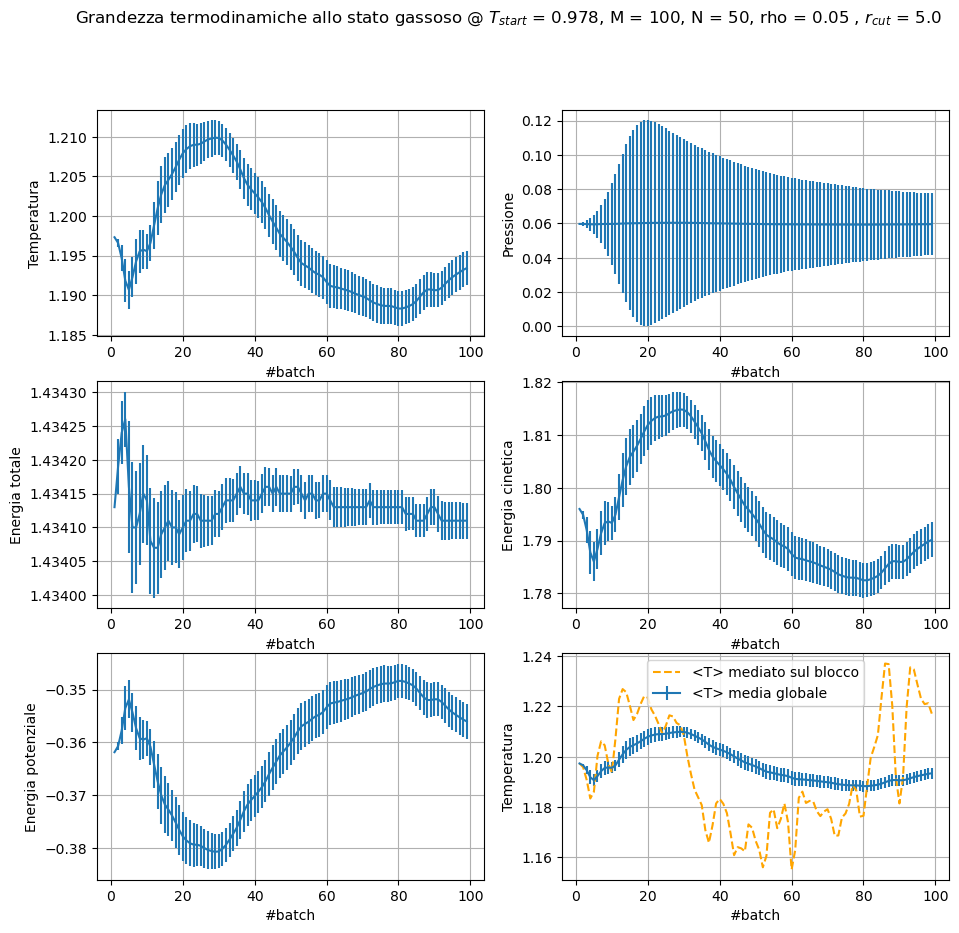

In [7]:
## STATO GASSOSO: equilibrio raggiunto dopo 10000 step partendo da T = 0.978
#Lettura file
filename_pressure = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_GAS/OUTPUT/pressure.txt"
filename_temperature = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_GAS/OUTPUT/temperature.txt"
filename_kinetic_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_GAS/OUTPUT/kinetic_energy.txt"
filename_potential_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_GAS/OUTPUT/potential_energy.txt"
filename_total_energy = "Codici_finali/Esercizio_4.2/NSL_SIMULATOR_GAS/OUTPUT/total_energy.txt"

PRS = pd.read_table(filename_pressure, delimiter = "\t" , usecols=(3,4) , 
names = ('P_Media', 'P_Stdev_Media'),header = 0 )

TEM = pd.read_table(filename_temperature, delimiter = "\t" , usecols=(2,3,4) , 
names = ('T_Current', 'T_Media', 'T_Stdev_Media'),header = 0 )

KEN = pd.read_table(filename_kinetic_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('KE_Media', 'KE_Stdev_Media'),header = 0 )

PEN = pd.read_table(filename_potential_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('PE_Media', 'PE_Stdev_Media'),header = 0 )

TEN = pd.read_table(filename_total_energy, delimiter = "\t" , usecols=(3,4) , 
names = ('TE_Media', 'TE_Stdev_Media'),header = 0 )

#estrarre i dati dalle colonne del file di testo
TEM['T_Current'] = pd.to_numeric(TEM['T_Current'] , errors = 'coerce')
TEM['T_Media'] = pd.to_numeric(TEM['T_Media'] , errors = 'coerce')
TEM['T_Stdev_Media'] = pd.to_numeric(TEM['T_Stdev_Media'] , errors = 'coerce')

PRS['P_Media'] = pd.to_numeric(PRS['P_Media'] , errors = 'coerce')
PRS['P_Stdev_Media'] = pd.to_numeric(PRS['P_Stdev_Media'] , errors = 'coerce')

TEN['TE_Media'] = pd.to_numeric(TEN['TE_Media'] , errors = 'coerce')
TEN['TE_Stdev_Media'] = pd.to_numeric(TEN['TE_Stdev_Media'] , errors = 'coerce')

KEN['KE_Media'] = pd.to_numeric(KEN['KE_Media'] , errors = 'coerce')
KEN['KE_Stdev_Media'] = pd.to_numeric(KEN['KE_Stdev_Media'] , errors = 'coerce')

PEN['PE_Media'] = pd.to_numeric(PEN['PE_Media'] , errors = 'coerce')
PEN['PE_Stdev_Media'] = pd.to_numeric(PEN['PE_Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
T_Current_vector = TEM['T_Current']
T_Media_vector = TEM['T_Media']
T_Stdev_Media_vector = TEM['T_Stdev_Media']

P_Media_vector = PRS['P_Media']
P_Stdev_Media_vector = PRS['P_Stdev_Media']

TE_Media_vector = TEN['TE_Media']
TE_Stdev_Media_vector = TEN['TE_Stdev_Media']

KE_Media_vector = KEN['KE_Media']
KE_Stdev_Media_vector = KEN['KE_Stdev_Media']

PE_Media_vector = PEN['PE_Media']
PE_Stdev_Media_vector = PEN['PE_Stdev_Media']

#generare Array di interi da 1 a N
N = len(T_Media_vector);
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
#disegnare grafico di media con barre d'errore (deviazione standard della media)
fig, axs = plt.subplots(3,2, figsize = (11,10))
fig.suptitle('Grandezza termodinamiche allo stato gassoso @ $T_{start}$ = 0.978, M = 100, N = 50, rho = 0.05 , $r_{cut}$ = 5.0 ')

axs[0,0].errorbar(N_vector, T_Media_vector, yerr = T_Stdev_Media_vector, label = '<T> media globale')
axs[0,0].set_xlabel('#batch')
axs[0,0].set_ylabel('Temperatura')
axs[0,0].grid(True)

axs[0,1].errorbar(N_vector, P_Media_vector, yerr = Stdev_Media_vector)
axs[0,1].set_xlabel('#batch')
axs[0,1].set_ylabel('Pressione')
axs[0,1].grid(True)

axs[1,0].errorbar(N_vector, TE_Media_vector, yerr = TE_Stdev_Media_vector)
axs[1,0].set_xlabel('#batch')
axs[1,0].set_ylabel('Energia totale')
axs[1,0].grid(True)

axs[1,1].errorbar(N_vector, KE_Media_vector, yerr = KE_Stdev_Media_vector)
axs[1,1].set_xlabel('#batch')
axs[1,1].set_ylabel('Energia cinetica')
axs[1,1].grid(True)

axs[2,0].errorbar(N_vector, PE_Media_vector, yerr = PE_Stdev_Media_vector)
axs[2,0].set_xlabel('#batch')
axs[2,0].set_ylabel('Energia potenziale')
axs[2,0].grid(True)

axs[2,1].errorbar(N_vector, T_Media_vector, yerr = T_Stdev_Media_vector, label = '<T> media globale')
axs[2,1].plot(N_vector, T_Current_vector, linestyle = '--', color = 'orange', label = '<T> mediato sul blocco')
axs[2,1].set_xlabel('#batch')
axs[2,1].set_ylabel('Temperatura')
axs[2,1].legend()
axs[2,1].grid(True)

plt.show()

Nei grafici di tutti e tre gli stati della materia, si può osservare, nel plot in basso a destra, il confronto tra media globale e media di blocco. Mentre, per il solido e il liquido, si riesce a raggiungere un equilibrio stazionario per la temperatura, il gas esibisce un comportamento instabile anche dopo diverse migliaia di step di equilibrazione. Il motivo di questo fenomeno è suggerito dalle oscillazioni della $<T>$ mediata sul blocco, le quali non sono a media nulla su un numero di blocchi dell'ordine dell'unità. La causa di questo comportamento irregolare è da ricercare non tanto nel numero di step impiegati per equilibrare, quanto nella dimensione scelta del blocco.

Lo studio di come la dimensione $N$ di ogni blocco influisce sulla statistica delle grandezze termodinamiche sarà approfondita nell'Esercitazione 7.